# Installation and setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
#Importing libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
#load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
x_train #its a bag of words

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [7]:
#apply padding - make all reviews of a fixed length - if review has len less than 100 then 0s will be added, if larger it will be truncated
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [8]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Building Model

In [9]:
#define object (initializing RNN)
model = tf.keras.models.Sequential()

In [ ]:
#Add Embedding Layer - compress input feature space into smaller one


In an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.

The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.

The position of a word in the learned vector space is referred to as its embedding.

Embedding layer must be first layer in model

In [10]:
#input dimension = no. of unique words
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

In [11]:
# Add LSTM layer - to understand the relationship b/w different elements of sequence i.e diff words and reviews
model.add(tf.keras.layers.LSTM(units=128,activation='tanh'))

In [12]:
# Add output layer 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compile model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# Training Model

In [16]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 [==============================] - 105s 522ms/step - loss: 0.6917 - accuracy: 0.5636 - val_loss: 0.6504 - val_accuracy: 0.7025
Epoch 2/5
196/196 [==============================] - 103s 528ms/step - loss: 0.5942 - accuracy: 0.7023 - val_loss: 0.5325 - val_accuracy: 0.7462
Epoch 3/5
196/196 [==============================] - 104s 531ms/step - loss: 0.4872 - accuracy: 0.7763 - val_loss: 0.4883 - val_accuracy: 0.7608
Epoch 4/5
196/196 [==============================] - 103s 527ms/step - loss: 0.4183 - accuracy: 0.8177 - val_loss: 0.4350 - val_accuracy: 0.8017
Epoch 5/5
196/196 [==============================] - 103s 528ms/step - loss: 0.3635 - accuracy: 0.8510 - val_loss: 0.4055 - val_accuracy: 0.8176


In [18]:
#prediction
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
print(y_pred[10][0]), print(y_test[10])

1
1


(None, None)

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

acc_cm = accuracy_score(y_test,y_pred)
print('accuracy score is {}'.format(acc_cm))

[[10417  2083]
 [ 2476 10024]]
accuracy score is 0.81764


# Learning Curve

In [22]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

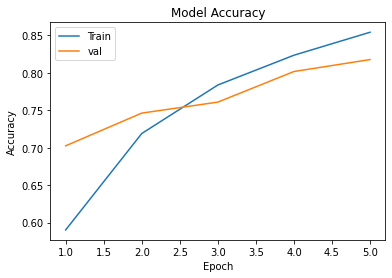

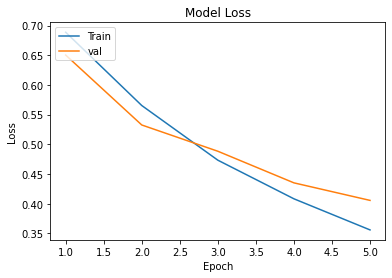

In [23]:
learning_curve(history, 5)